# The lines before the header were manually removed

New Code with pickle

In [3]:
import pandas as pd
import pickle

# Load the data
try:
    with open("data/county_donnegal.pkl", "rb") as f:
        county_donnegal = pickle.load(f)
except FileNotFoundError:
    county_donnegal = pd.read_csv("data/dly2075_donnegal-finner.csv")
    county_donnegal["date"] = pd.to_datetime(county_donnegal["date"])
    county_donnegal = county_donnegal[(county_donnegal["date"].dt.year >= 2018) & (county_donnegal["date"].dt.year <= 2022)]


In [4]:
county_donnegal = county_donnegal.loc[:, ~county_donnegal.columns.str.startswith(('ind', 'file'))]

In [5]:
# Assuming df is the name of your dataframe
county_donnegal= county_donnegal.replace(r'\s+', 777444, regex=True)


In [6]:
for column in county_donnegal.columns:
    # get the indices of the rows that contain 777444
    indices = county_donnegal[county_donnegal[column] == 777444].index.tolist()
    
    # get the date column values for those indices
    dates = county_donnegal.loc[indices, 'date'].tolist()
    
    # print the results
    print(f'The value of 777444 occurred {len(indices)} times in {column} on the following dates: {dates}.')

The value of 777444 occurred 0 times in date on the following dates: [].
The value of 777444 occurred 0 times in maxtp on the following dates: [].
The value of 777444 occurred 0 times in mintp on the following dates: [].
The value of 777444 occurred 0 times in igmin on the following dates: [].
The value of 777444 occurred 0 times in gmin on the following dates: [].
The value of 777444 occurred 0 times in rain on the following dates: [].
The value of 777444 occurred 0 times in cbl on the following dates: [].
The value of 777444 occurred 0 times in wdsp on the following dates: [].
The value of 777444 occurred 0 times in hm on the following dates: [].
The value of 777444 occurred 0 times in ddhm on the following dates: [].
The value of 777444 occurred 0 times in hg on the following dates: [].
The value of 777444 occurred 1826 times in soil on the following dates: [Timestamp('2018-01-01 00:00:00'), Timestamp('2018-01-02 00:00:00'), Timestamp('2018-01-03 00:00:00'), Timestamp('2018-01-04 00

In [7]:
county_donnegal[["glorad","hm","ddhm"]] = county_donnegal[["glorad","hm","ddhm"]].astype("int64")

In [8]:
# Convert multiple columns to float data type
columns_to_convert = ["gmin", "rain", "cbl", "wdsp", "soil", "pe", "evap", "smd_wd", "smd_md", "smd_pd"]
county_donnegal[columns_to_convert] = county_donnegal[columns_to_convert].astype(float)


In [9]:
county_donnegal = county_donnegal.drop(["soil","igmin"], axis=1)


In [10]:
with open("data/county_donnegal.pkl", "wb") as f:
        pickle.dump(county_donnegal, f)

In [58]:
import pandas as pd
import pickle

with open("data/county_donnegal.pkl", "rb") as f:
    county_donnegal = pickle.load(f)

In [99]:
print(county_donnegal.dtypes)

date              datetime64[ns]
maxtp                    float64
mintp                    float64
igmin                     object
gmin                     float64
rain                     float64
cbl                      float64
wdsp                     float64
hm                         int64
ddhm                       int64
hg                         int64
pe                       float64
evap                     float64
smd_wd                   float64
smd_md                   float64
smd_pd                   float64
glorad                     int64
rainfall_class              bool
dtype: object


In [13]:
county_donnegal['rainfall_class'] = county_donnegal['rain'] != 0

In [14]:
with open("data/county_donnegal.pkl", "wb") as f:
        pickle.dump(county_donnegal, f)

Starting point from loading Pkl file

In [15]:
import pandas as pd
import pickle

with open("data/county_donnegal.pkl", "rb") as f:
    county_donnegal = pickle.load(f)


In [16]:
county_donnegal.head()

,date,maxtp,mintp,igmin,gmin,rain,cbl,wdsp,hm,ddhm,hg,pe,evap,smd_wd,smd_md,smd_pd,glorad,rainfall_class
2531,2018-01-01,8.1,4.1,0,3.3,4.1,992.6,18.7,33,290,45,0.9,1.2,0.0,-3.2,-10.0,122,True
2532,2018-01-02,8.8,3.9,0,1.1,15.1,985.2,16.0,38,290,51,0.8,1.1,0.0,-10.0,-10.0,96,True
2533,2018-01-03,9.4,5.6,0,4.2,7.6,983.8,23.7,35,250,52,0.8,1.2,0.0,-6.8,-10.0,85,True
2534,2018-01-04,7.6,1.7,0,0.9,13.2,984.4,12.3,24,280,38,0.4,0.5,0.0,-10.0,-10.0,148,True
2535,2018-01-05,6.8,2.2,0,-0.2,2.8,990.2,7.0,14,240,21,0.2,0.3,0.0,-2.6,-10.0,245,True


In [17]:
county_donnegal.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
maxtp,1826.0,13.294304,4.630750,0.8,9.800,13.15,16.50,29.3
mintp,1826.0,7.060077,4.332603,-5.1,3.800,7.10,10.60,18.1
gmin,1826.0,5.626342,4.944586,-9.4,1.700,5.90,9.50,17.5
rain,1826.0,3.383187,5.090059,0.0,0.000,1.20,4.80,44.4
cbl,1826.0,1007.911829,12.685860,963.7,999.325,1009.25,1016.90,1043.8
wdsp,1826.0,10.201205,4.694540,2.6,6.600,9.20,13.00,32.4
hm,1826.0,18.211939,7.034669,5.0,13.000,17.00,22.00,48.0
ddhm,1826.0,213.132530,83.949371,0.0,140.000,240.00,280.00,350.0
hg,1826.0,26.054217,10.448874,6.0,18.000,24.00,33.00,67.0
pe,1826.0,1.516156,1.005234,0.0,0.700,1.30,2.20,5.7


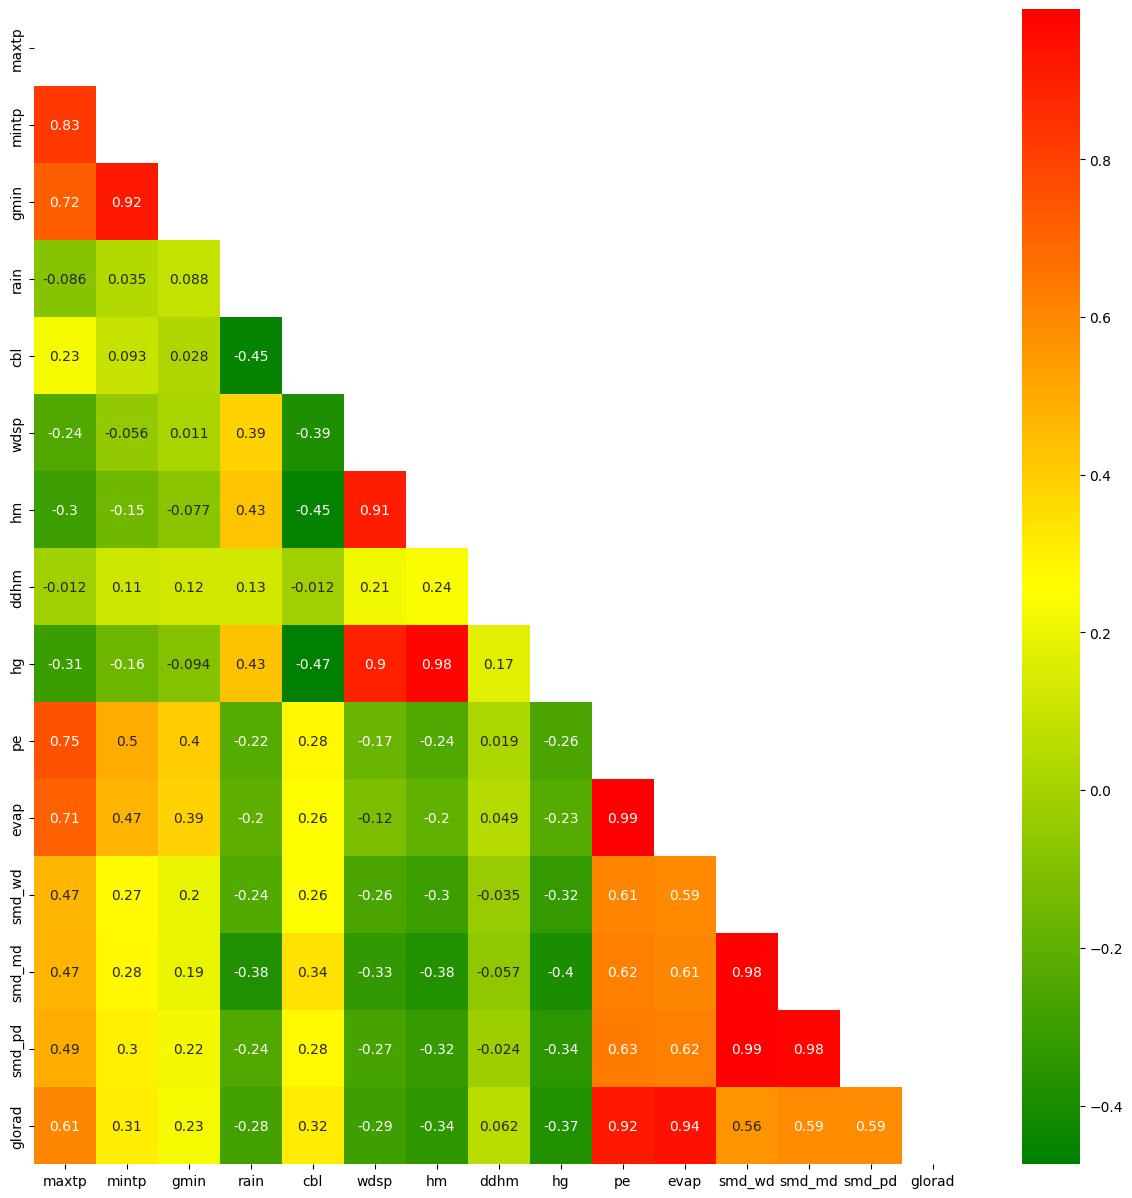

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the colors for the colormap
colors = ['green', 'yellow', 'red']

# Create the colormap
cmap = LinearSegmentedColormap.from_list('green_yellow_red', colors)

# Plot correlation matrix for numerical variables in shanon dataset except date,ind.5,ind.4,ind.3,ind.2,ind.1
num_cols = county_donnegal.select_dtypes(include="number").filter(regex='^(?!ind)').columns  
corr = county_donnegal[num_cols].corr(method="pearson")
plt.figure(figsize=(15, 15))
# Create a lower triangular heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True,cmap=cmap)
plt.savefig("donnegal_heatmap_pearson.png")

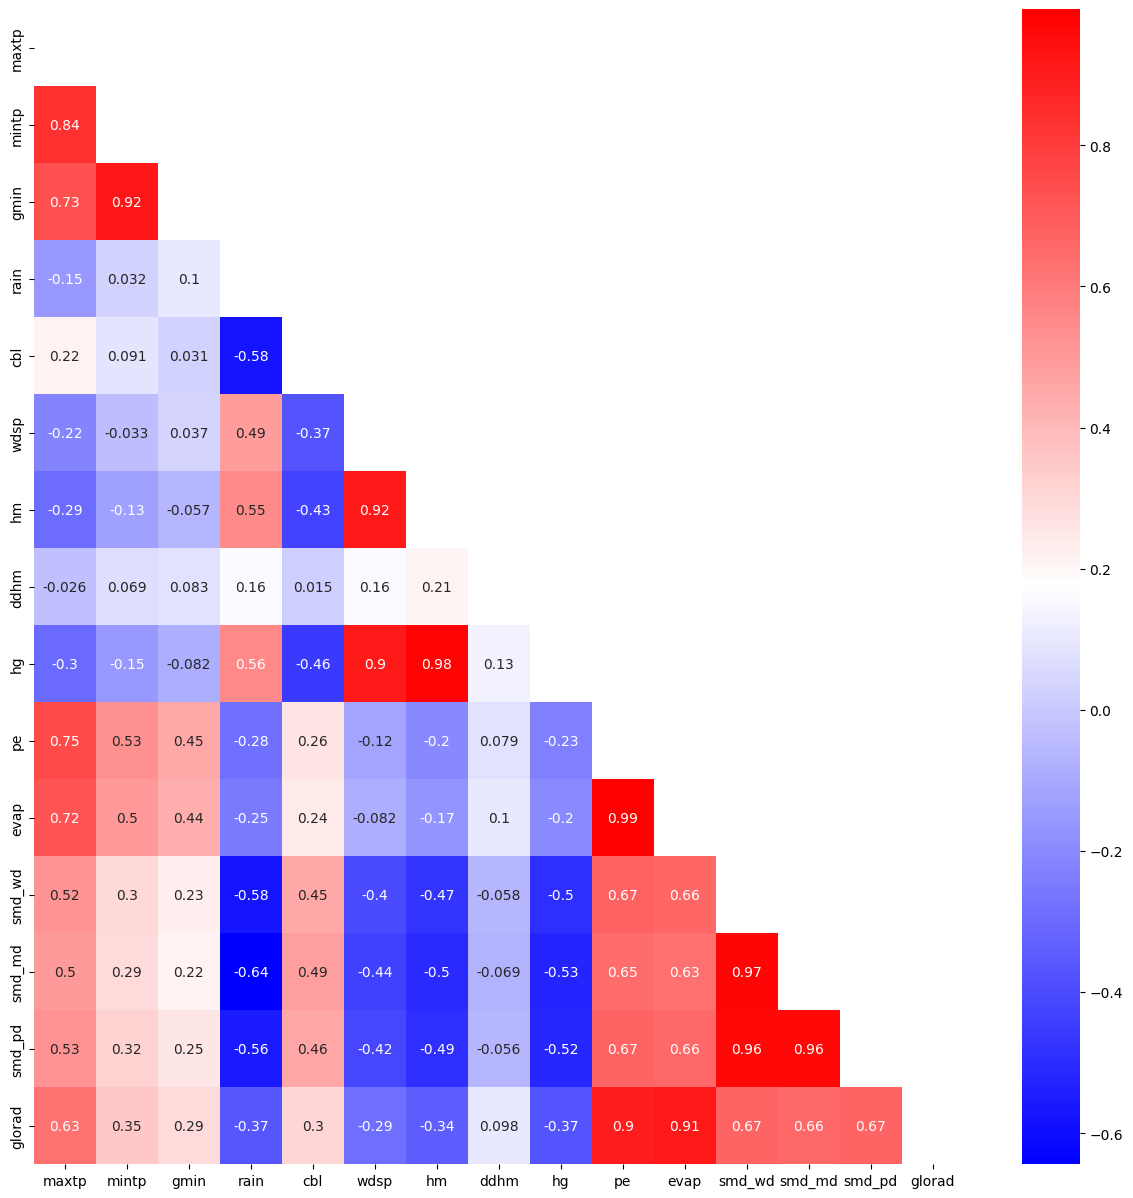

In [19]:
num_cols = county_donnegal.select_dtypes(include="number").filter(regex='^(?!ind)').columns     
corr = county_donnegal[num_cols].corr(method="spearman")
plt.figure(figsize=(15, 15))
# Create a lower triangular heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True,cmap="bwr")
plt.savefig("donnegal_heatmap_spearman.png")

In [60]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_donnegal.drop(['rainfall_class','date'], axis=1)
y = county_donnegal['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("KNN (k=5)", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.991,0.982,0.963,1.000,0.982
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,KNN (k=5),0.922,0.871,0.923,0.819,0.871
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Remove hm

In [62]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = county_donnegal.drop(['rainfall_class','date','hm'], axis=1)
y = county_donnegal['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("KNN (k=5)", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)


,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.992,0.983,0.967,1.000,0.983
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,KNN (k=5),0.932,0.889,0.926,0.851,0.889
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Removing Minimum Temperature

In [63]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = county_donnegal.drop(['rainfall_class','date', 'mintp'], axis=1)
y = county_donnegal['rainfall_class']
scaler = PowerTransformer()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("KNN (k=5)", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.990,0.980,0.960,1.000,0.980
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,KNN (k=5),0.923,0.873,0.926,0.819,0.873
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Dropping pe

In [65]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = county_donnegal.drop(['date','rainfall_class', 'pe'], axis=1)
y = county_donnegal['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("KNN (k=5)", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.992,0.983,0.967,1.000,0.983
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,KNN (k=5),0.916,0.862,0.926,0.798,0.862
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Dropping hg

In [66]:
from sklearn.preprocessing import RobustScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = county_donnegal.drop(['date','rainfall_class', 'hg'], axis=1)
y = county_donnegal['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("KNN (k=5)", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.991,0.982,0.963,1.000,0.982
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,KNN (k=5),0.924,0.876,0.934,0.819,0.876
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Dropping Smd_wd

In [67]:
from sklearn.preprocessing import RobustScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = county_donnegal.drop(['date','rainfall_class','smd_wd'], axis=1)
y =  county_donnegal['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("KNN (k=5)", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.991,0.982,0.963,1.000,0.982
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,KNN (k=5),0.923,0.873,0.926,0.819,0.873
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Dropping Smd_md 

In [68]:
from sklearn.preprocessing import RobustScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score
 
X = county_donnegal.drop(['date','rainfall_class','smd_md'], axis=1)
y = county_donnegal['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("KNN (k=5)", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.990,0.980,0.960,1.000,0.980
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,KNN (k=5),0.922,0.871,0.923,0.819,0.871
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


Dropping all previously mentioned columns

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

X = county_donnegal.drop(['date','rainfall_class','hg','hm','pe','mintp','smd_wd','smd_md'], axis=1)
y = county_donnegal['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("KNN (k=5)", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.989,0.978,0.956,1.000,0.978
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,KNN (k=5),0.934,0.892,0.934,0.851,0.892
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


In [33]:
#pip install lofo-importance

In [34]:
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold
from lofo import LOFOImportance, Dataset, plot_importance
%matplotlib inline

C:\Users\meatefza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lofo\lofo_importance.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [70]:
# extract a sample of the data
sample_donnegal =county_donnegal.drop(['date','rain'], axis=1)
#sample_df.sort_values("columnid", inplace=True) # Sort by time for time split validation

In [71]:
# define the validation scheme
cv4_donnegal = KFold(n_splits=4, shuffle=False, random_state=None) # Don't shuffle to keep the time split split validation

In [72]:
# define the binary target and the features
datasetdonnegal = Dataset(df=sample_donnegal, target="rainfall_class", features=[col for col in sample_donnegal.columns if col != "rainfall_class"])

In [73]:
from sklearn.linear_model import LogisticRegression
# change the default model to logistic regression
log_reg = LogisticRegression()
lofo_implogdonnegal = LOFOImportance(datasetdonnegal, cv=cv4_donnegal, scoring="roc_auc", model=log_reg)

In [74]:
# get the mean and standard deviation of the importances in pandas format
importance_dflogdonnegal = lofo_implogdonnegal.get_importance()

  0%|          | 0/15 [00:00<?, ?it/s]

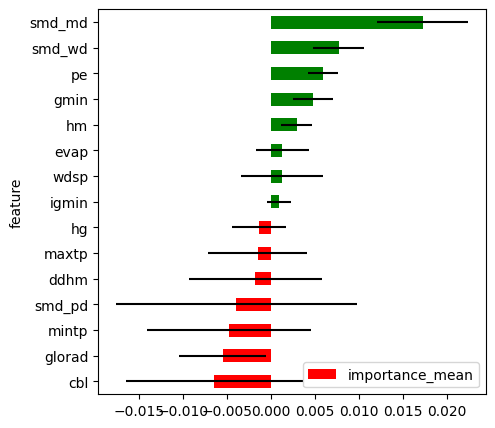

In [75]:
# plot the means and standard deviations of the importances
plot_importance(importance_dflogdonnegal, figsize=(5, 5))

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf_cls =  RandomForestClassifier()
lofo_imprandomforestdonnegal = LOFOImportance(datasetdonnegal, cv=cv4_donnegal, scoring="roc_auc", model=rf_cls)

In [77]:
importance_dfforestdonnegal = lofo_imprandomforestdonnegal.get_importance()

  0%|          | 0/15 [00:00<?, ?it/s]

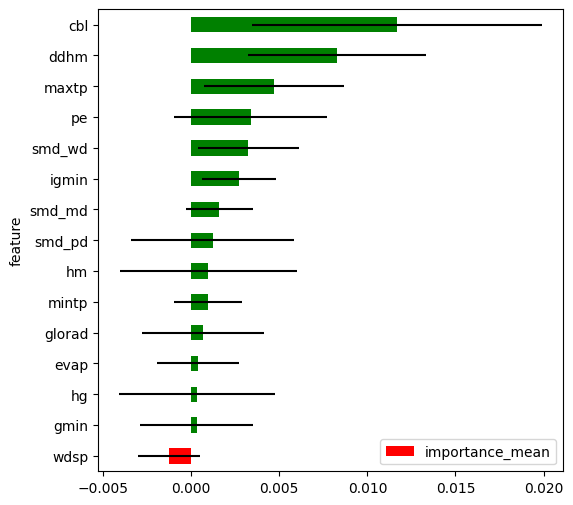

In [78]:
plot_importance(importance_dfforestdonnegal, figsize=(6, 6))

In [80]:
rf_knn =  KNeighborsClassifier(n_neighbors=5)
lofo_impknndonnegal = LOFOImportance(datasetdonnegal, cv=cv4_donnegal, scoring="roc_auc", model=rf_knn)

In [81]:
importance_knndonnegal = lofo_impknndonnegal.get_importance()

  0%|          | 0/15 [00:00<?, ?it/s]

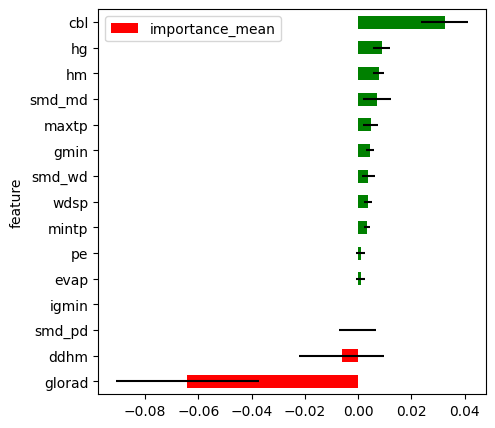

In [83]:
plot_importance(importance_knndonnegal, figsize=(5, 5))

In [85]:
from sklearn.ensemble import AdaBoostClassifier
rf_adaboooster =  AdaBoostClassifier()
lofo_impadaboosterdonnegal = LOFOImportance(datasetdonnegal, cv=cv4_donnegal, scoring="roc_auc", model=rf_adaboooster)

In [86]:
importance_adadonnegal = lofo_impadaboosterdonnegal.get_importance()

  0%|          | 0/15 [00:00<?, ?it/s]

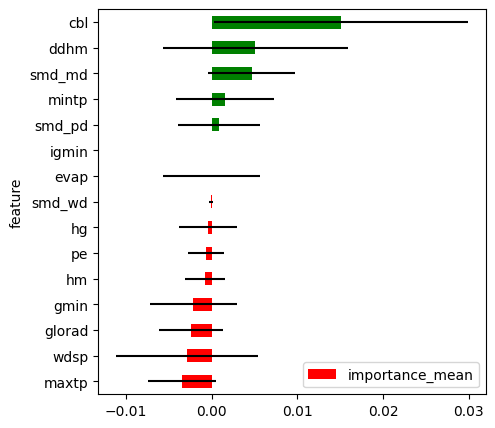

In [87]:
plot_importance(importance_adadonnegal, figsize=(5, 5))

In [88]:
from xgboost import XGBClassifier
rf_xgbbooster =  XGBClassifier()
lofo_impxgbboosterdonnegal = LOFOImportance(datasetdonnegal, cv=cv4_donnegal, scoring="roc_auc", model=rf_xgbbooster)

In [89]:
importance_xgbdonnegal = lofo_impxgbboosterdonnegal.get_importance()

  0%|          | 0/15 [00:00<?, ?it/s]

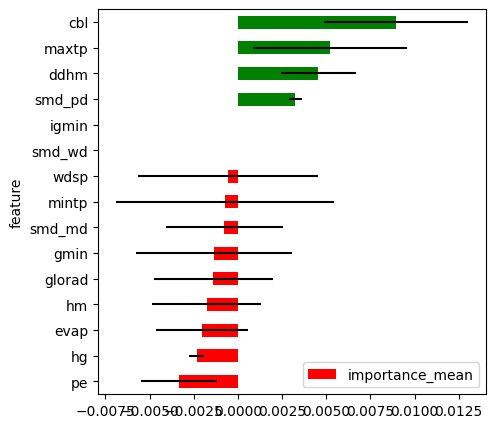

In [90]:
plot_importance(importance_xgbdonnegal, figsize=(5, 5))

In [53]:
import shap
shap.initjs() 

Permutation explainer: 367it [01:49,  3.08it/s]                         


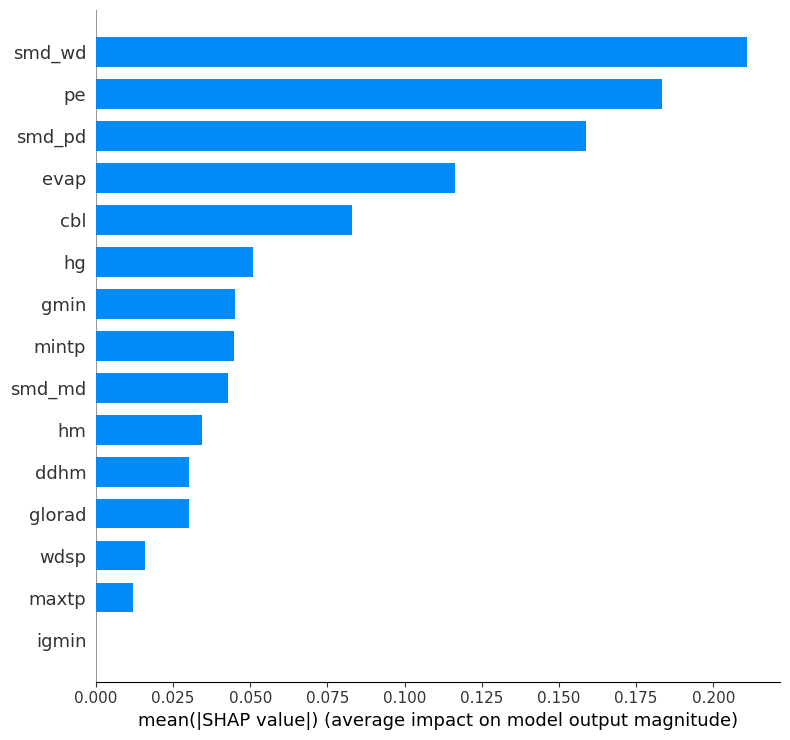

In [93]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_donnegal.drop(['date','rain','rainfall_class'], axis=1)
y = county_donnegal['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logregdonnegal = LogisticRegression().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainerlogregdonnegal = shap.Explainer(logregdonnegal.predict, X_train)
shap_valueslogregdonnegal = explainerlogregdonnegal(X_test)

# visualize the first prediction's explanation
shap.summary_plot(shap_valueslogregdonnegal, X_test, plot_type="bar")
#shap.plots.force(shap_valueslogregdonnegal[0])

Permutation explainer: 367it [04:29,  1.27it/s]                         


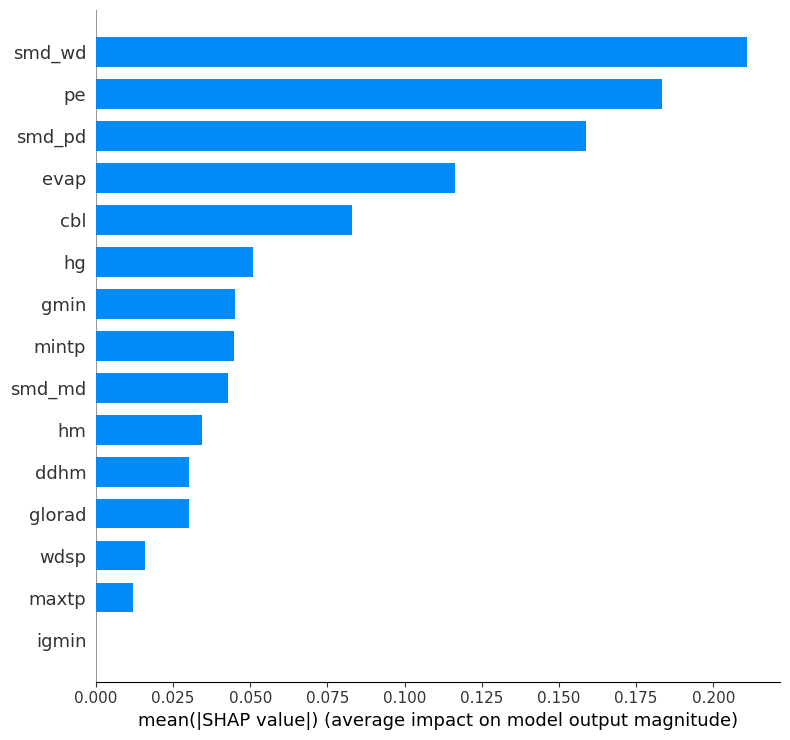

In [95]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_donnegal.drop(['date','rain','rainfall_class'], axis=1)
y = county_donnegal['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelxgb = XGBClassifier().fit(X_train, y_train)

explainerxgb = shap.Explainer(modelxgb.predict, X_train)
shap_xgb = explainerxgb(X_test)
# visualize the first prediction's explanation
shap.summary_plot(shap_valueslogregdonnegal, X_test, plot_type="bar")

Permutation explainer: 367it [12:23,  2.10s/it]                         
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


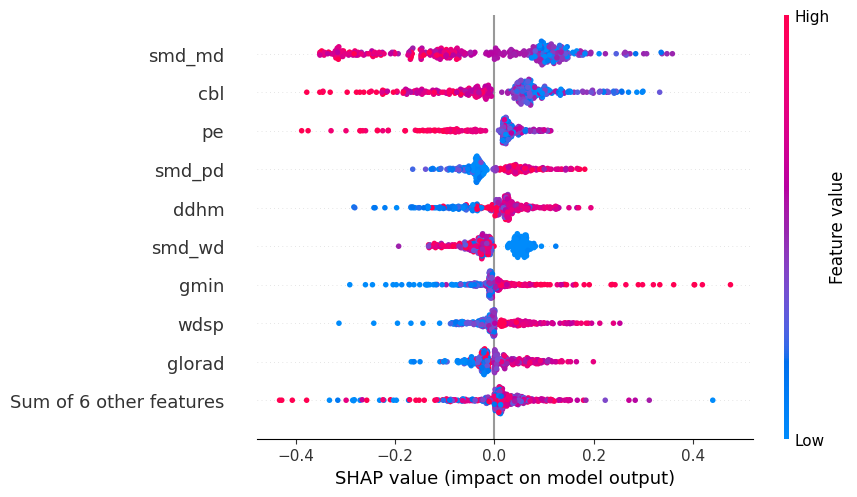

In [96]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_donnegal.drop(['date','rain','rainfall_class'], axis=1)
y = county_donnegal['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


adboostdonnegal = AdaBoostClassifier().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer_adaboostdonnegal = shap.Explainer(adboostdonnegal.predict, X_train)
shap_adaboostdonnegal = explainer_adaboostdonnegal(X_test)

shap.plots.beeswarm(shap_adaboostdonnegal)

Permutation explainer: 367it [18:55,  3.16s/it]                         


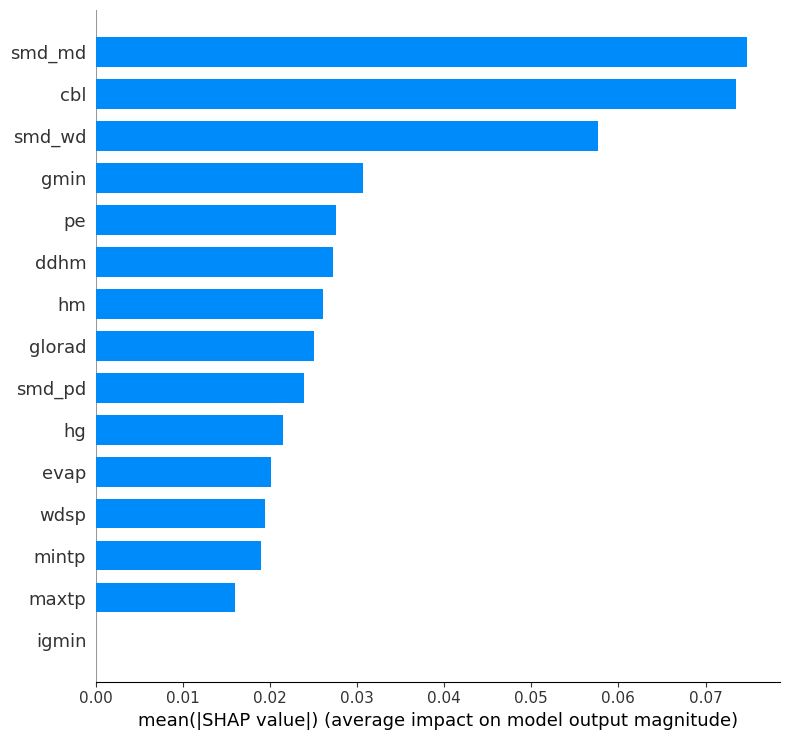

In [97]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_donnegal.drop(['date','rain','rainfall_class'], axis=1)
y = county_donnegal['rainfall_class']
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_donnegal = RandomForestClassifier().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer_rf_donnegal = shap.Explainer(rf_donnegal.predict, X_train)
shap_rf_donnegal = explainer_rf_donnegal(X_test)

# visualize the first prediction's explanation
shap.summary_plot(shap_rf_donnegal, X_test, plot_type="bar")


Permutation explainer: 367it [38:45,  6.37s/it]                          


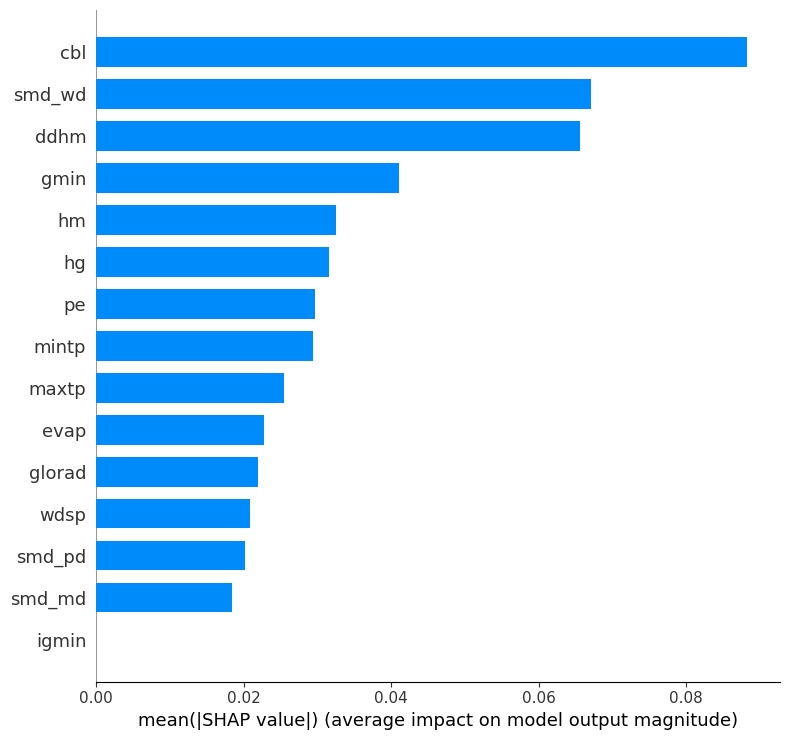

In [98]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_donnegal.drop(['date','rain','rainfall_class'], axis=1)
y = county_donnegal['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knndonnegal = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer_knndonnegal = shap.Explainer(knndonnegal.predict, X_train)
shap_knndonnegal = explainer_knndonnegal(X_test)

shap.summary_plot(shap_knndonnegal, X_test, plot_type="bar")